# AI Lab Assignment 4

## 0. Explore the notebook *demo_german_credit_data.ipynb*

## 1. Building and testing classifiers on synthetic datasets (2 points)

In [1]:
# Source:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

def plot_classifiers(classifiers, datasets):
    
    figure = plt.figure(figsize=(4*6, 4*4))
    h = .02  # step size in the mesh
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=.4,
                                                            random_state=42)
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data", fontsize=24)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
        
        # iterate over classifiers
        for name, clf in classifiers:
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)
            
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name, fontsize=24)
            ax.text(xx.max() - .3, yy.min() + .3, ('Score test: %.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()

In [4]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X @ np.asarray([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

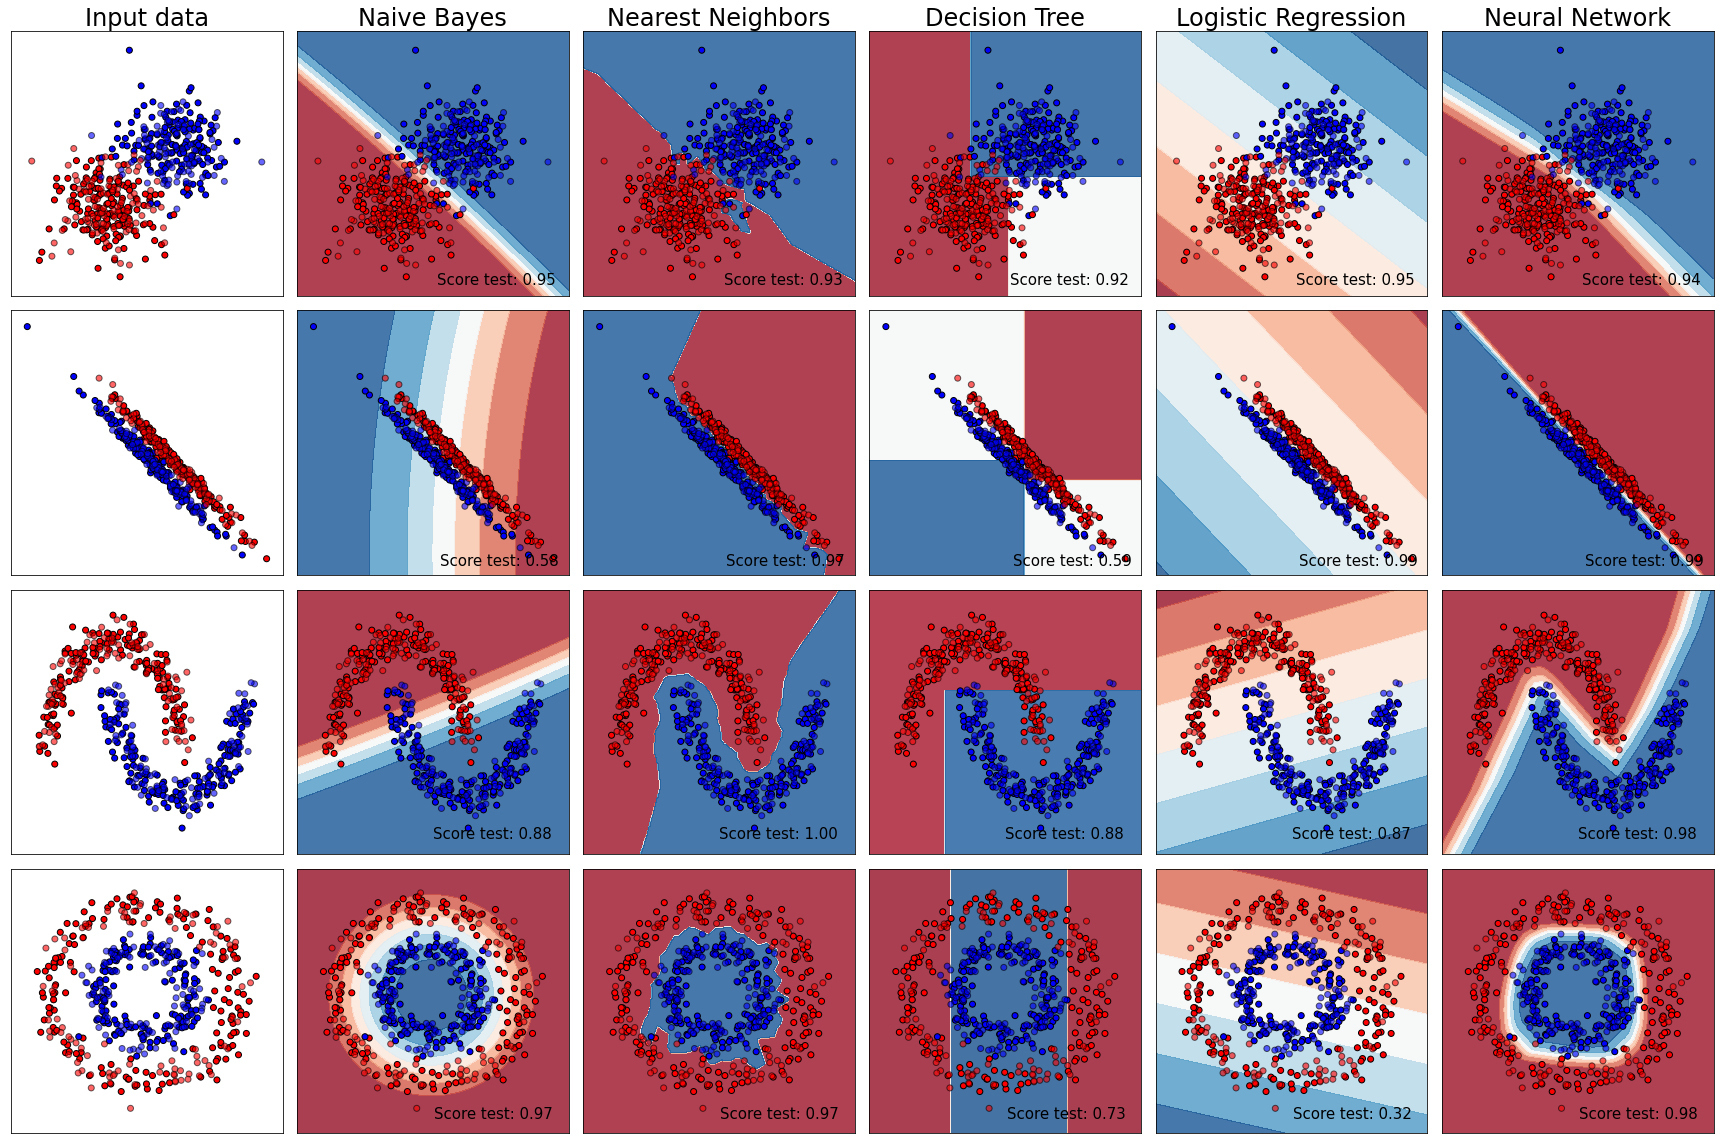

In [5]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=1)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=2)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1.0e10,solver='lbfgs')), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=1000,
                              alpha=0.0))]

plot_classifiers(classifiers, datasets)

In [6]:
# List of the parameters of the different classifiers
for name, clf in classifiers:
    print(clf)

GaussianNB()
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(criterion='entropy', max_depth=2)
LogisticRegression(C=10000000000.0)
MLPClassifier(alpha=0.0, hidden_layer_sizes=(50,), max_iter=1000)


**Try changing the following parameters (at least 3-5 variations in each case) and see the consequences on the corresponding classification boundary:**

* Number of neighbors in k-nn. 
    * Should it be odd when there are two classes? Justify your answer.
    * Should it be odd when there are more classes? Justify your answer.
* Maximum depth of decision trees.
* Number of neurons in the neural network and maximum number of training epochs. **Note:** (50,) indicates a single hidden layer with 50 neurons. (50,10,) indicates two hidden layers with 50 and 10 neurons respectively. (50,10,20,) indicates three hidden layers with 50, 10 and 20 neurons respectively, etc.

#### 1. Analysis of Number of neighbors in k-nn.


k-NN Classifiers


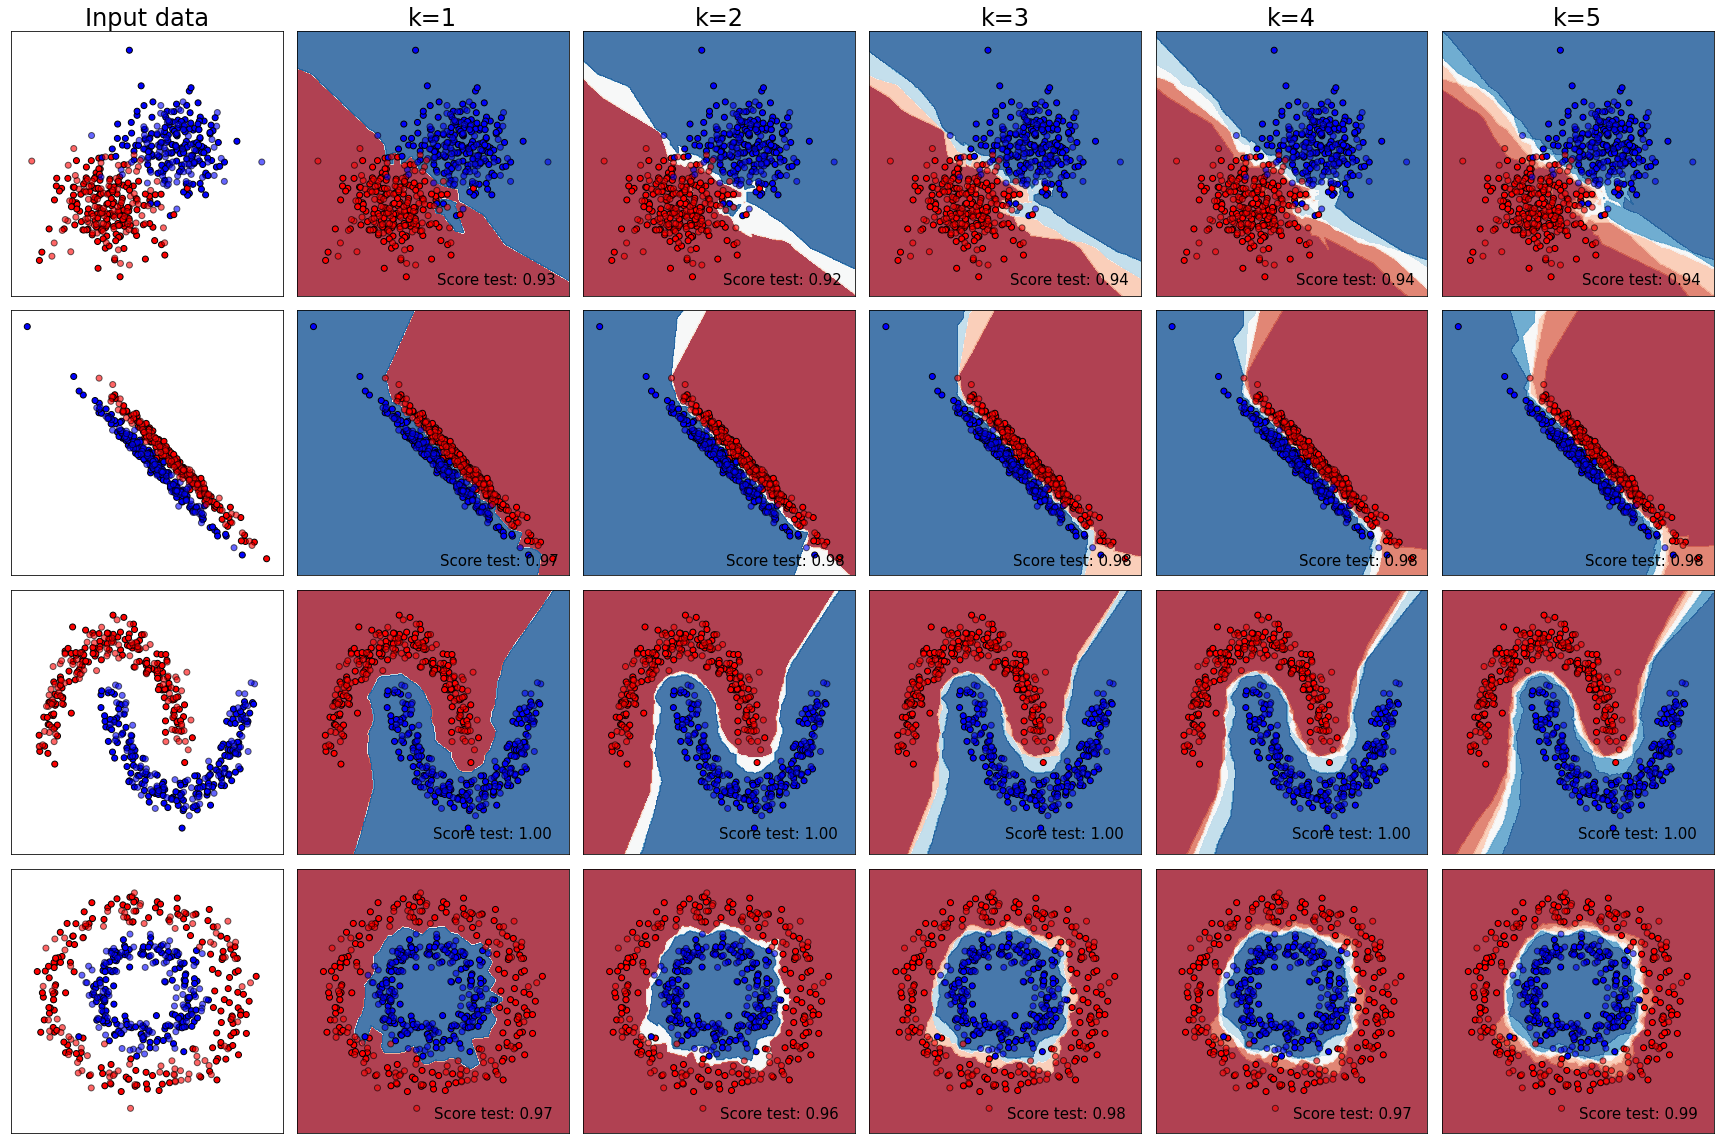

In [37]:
knn_classifiers=[]
for i in range(1,6):
    knn_classifiers.append(("k={0}".format(i),
                KNeighborsClassifier(n_neighbors=i)))

print("k-NN Classifiers")
plot_classifiers(knn_classifiers, datasets)

**General k Variation Analysis:**

The number of neighbors k is the single variable that allows the complexity of KNN to be changed. The categorization boundary gets smoother as the parameter k is increased. Alternatively, we might consider that as k rises, KNN complexity decreases.

This means that the decision boundary is wider and smoother hence, visually, the decision boundary is more easily visible as k increases.

**Should it be odd when there are two classes? Justify your answer.**

For binary classification, it is recommended to use odd values to prevent ties, This is because, in the case where two class labels receive the same score it is difficult to break a tie since KNN uses majority voting. We can also note that usually, as k increases the classifier score generally increases as a trend. However, It is usually greater for odd values of k than the next and previous even values. 

Example: Circular dataset, Score = 0.96 for K = 2 is lower than the score of K = 1(0.97) and K = 3(0.98). 


**Should it be odd when there are more classes? Justify your answer.**

General rule to be followed is to have an odd numbered k value especially if the number of classes is even. With multiple classes, it is still preferable to use an odd numbered k value. The majority voting use still exists and therefore, to break any ties, it is still better to use odd value of k.

#### 2. Analysis on Maximum depth of decision trees.

Decision Tree Classifiers


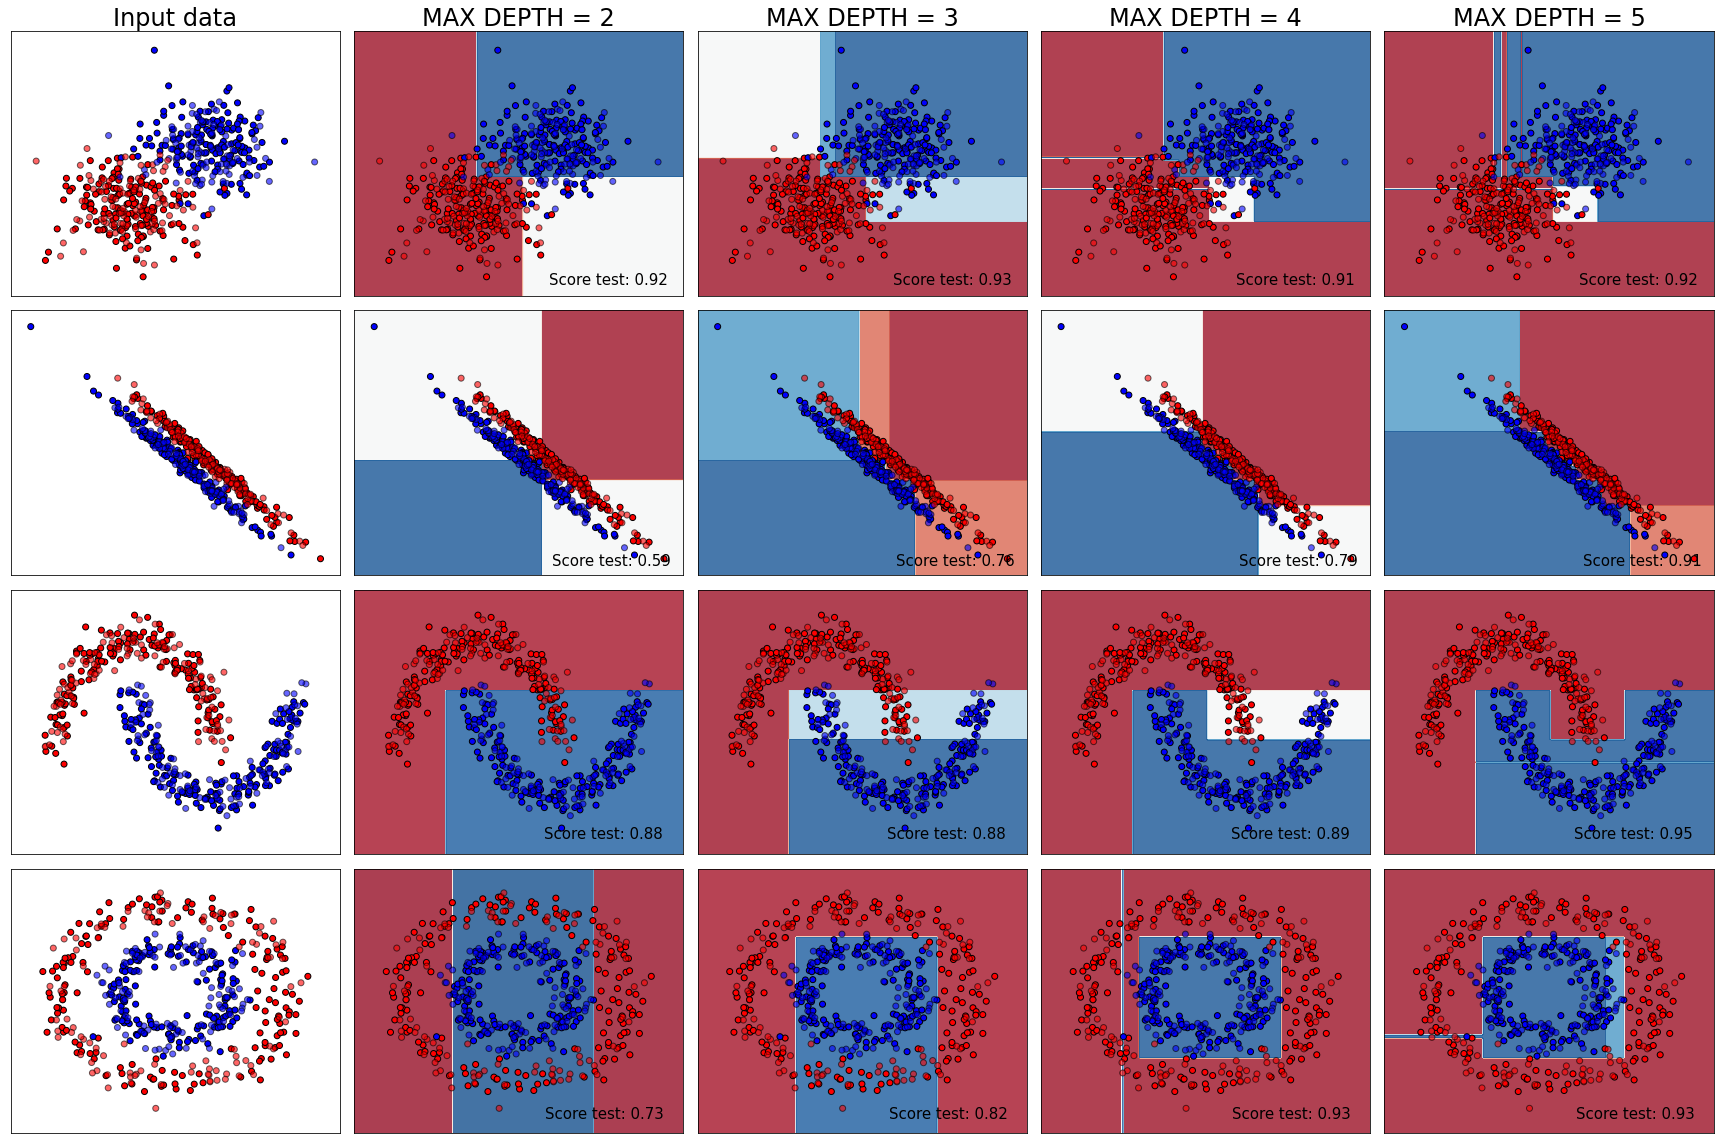

In [36]:
decision_tree_classifiers=[]
for i in range(2,6):
    decision_tree_classifiers.append(("MAX DEPTH = {0}".format(i),
                    DecisionTreeClassifier(criterion='entropy',
                                        max_depth=i)), # profundidad máxima del árbol
                                        )
print("Decision Tree Classifiers")
plot_classifiers(decision_tree_classifiers, datasets)

**Explanation:**
As we can note here that the accuracy of the decision tree classification is generally increasing as the Maximum depth of decision trees (k) is increased.

Larger the depth of the tree more are the chances of variance(overfitting). Whereas smaller the depth of the tree more are the chances of bias tree(underfitting). The complexity of the model increases as maximum depth is increased while becoming more difficult to understand the decision rules of a tree.



#### 3. Analysis on Number of neurons in the neural network and maximum number of training epochs

Neural Network Classifiers


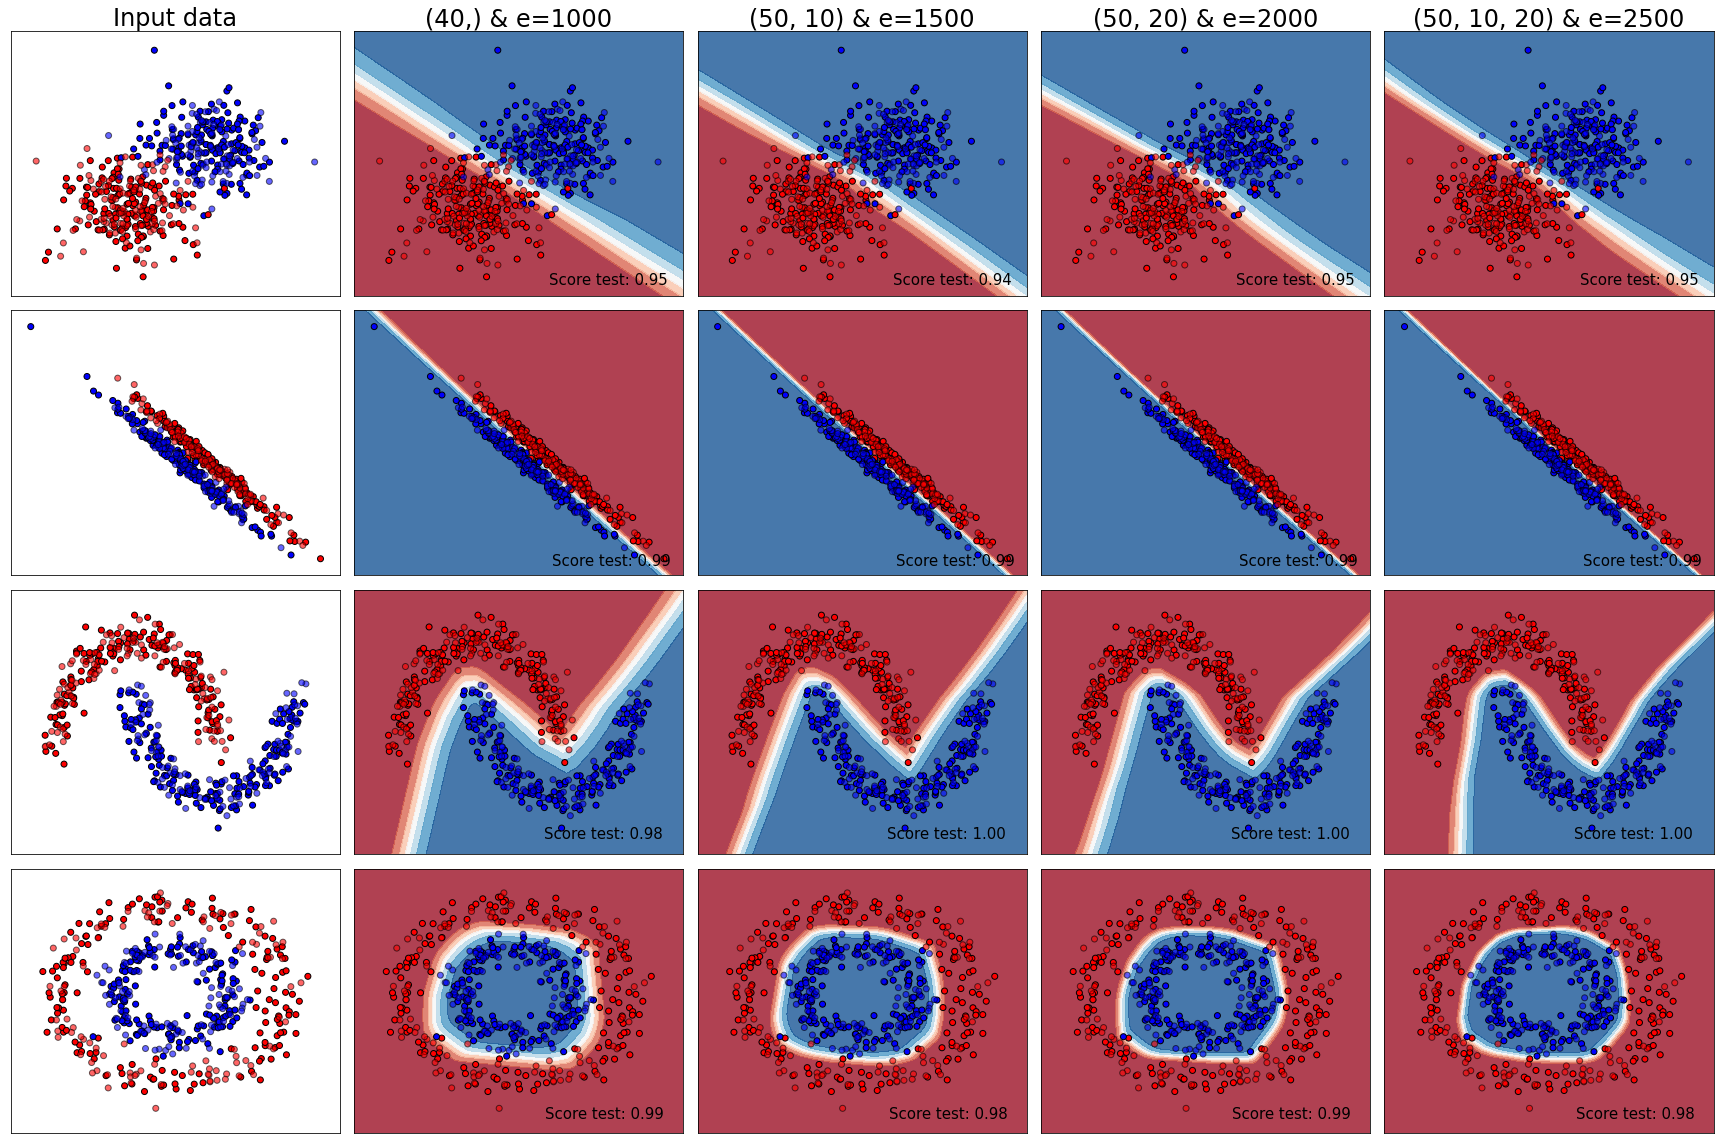

In [39]:
neural_network_parameters = [((40,),1000),((50,10),1500),((50,20),2000),((50,10,20),2500)]
neural_network_classifiers=[]
for i,j in neural_network_parameters:
    neural_network_classifiers.append(("{0} & e={1}".format(i,j),
                                        MLPClassifier(hidden_layer_sizes=i,
                                                    max_iter=j,
                                                    alpha=0.0))
                                        )
print("Neural Network Classifiers")
plot_classifiers(neural_network_classifiers, datasets)

* Number of neurons in the neural network and maximum number of training epochs. **Note:** (50,) indicates a single hidden layer with 50 neurons. (50,10,) indicates two hidden layers with 50 and 10 neurons respectively. (50,10,20,) indicates three hidden layers with 50, 10 and 20 neurons respectively, etc.

**Explanation:**


Low training epoch results in underfitting. The neural network's weights are adjusted more frequently as the number of epochs rises, and the curve shifts from underfitting to optimum to overfitting when number of training epoch's is too high. 

Increasing the number of hidden layers may or may not increase accuracy depending on the complexity of the problem being solved. Yes, accuracy in the test set will drop when the number of hidden layers is increased beyond the necessary number due to overfitting. 

Therefore, too many neurons in the hidden layers may also result in overfitting. It is therefore ideal to find the optimal number of hidden layers and neurons through testing.